#  AI CA5
# Neural Network with Keras
## Name: Fatemeh Naeinian

### Student ID: 810099018


## Definition of project:
This project is an introduction to neural network. We will use keras and tensorflow to build a multi layer fully connecetd. CIFAR10 dataset is used in this project which has 10 classes. We will analyse the impact of the different parameters such as loss function, number of epochs, optimizer and regularization.

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import SGD , Adam
from sklearn.model_selection import train_test_split
import random
import keras
from keras import datasets, layers, models
from sklearn.metrics import precision_score , recall_score, f1_score, accuracy_score

# load dataset and preprocessing

CIFAR10 dataset consists of photos with size (32,32,3) and our network has fully connected so it need a flatten array, so we need to reshape each photo to a array of size (3072, 1). Each pixel of the photo has an amount between 0 and 255 so for normalization we need to divide them by 255. A fully connected network cannot predict the classes with one neuron, so we need neurons as much as the number of the classes at last layer, so we need to change labels into one hot with to_categorical() function.

In [16]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

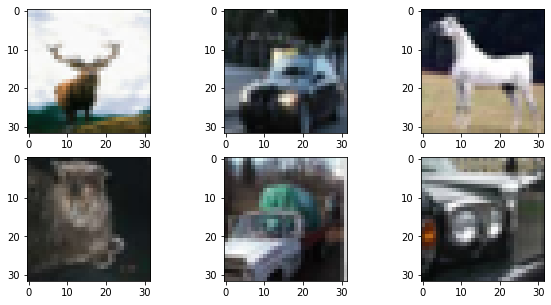

In [17]:
random_index = random.sample(range(1,x_train.shape[0]),6)
plt.figure(figsize=(10,5))
for i in range(6):
	plt.subplot(2,3,i+1)
	plt.imshow(x_train[random_index[i]])
plt.show()

In [18]:
x_train.shape

(50000, 32, 32, 3)

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [20]:
x_train = x_train.reshape((50000,32*32*3))
x_test = x_test.reshape((10000,32*32*3))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

# create a feed forward network

The model has 6 hidden layer and an output layer with softmax activation function. 


In [21]:
class mlp:
  def __init__(self, OPTIMIZER=SGD(learning_rate=0.01), LOSS='categorical_crossentropy', ACTIVATION="relu", drop=False):
    self.model = models.Sequential()
    self.model.add(layers.Dense(32*32*3, activation=ACTIVATION,kernel_initializer='he_uniform',input_shape=(32*32*3,)))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(1024, activation=ACTIVATION))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(600, activation=ACTIVATION))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(200, activation=ACTIVATION))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(64, activation=ACTIVATION))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(32, activation=ACTIVATION))
    if drop: self.model.add(layers.Dropout(.1))
    self.model.add(layers.Dense(10,activation="softmax"))
    self.model.compile(optimizer=OPTIMIZER, loss=LOSS, metrics=['accuracy'])
    self.model.summary()

  def fit(self , x_train , y_train, x_valid , y_valid, epochs=10):
    self.history = self.model.fit(x_train, y_train, epochs=epochs , batch_size=32, validation_data=(x_valid, y_valid))

  def accuracy_plot(self):
    fig = plt.figure()
    fig = plt.figure()
    plt.plot(self.history.history['accuracy'],'r')
    plt.plot(self.history.history['val_accuracy'],'b')
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.grid()

  def loss_plot(self):
    fig = plt.figure()
    plt.plot(self.history.history['loss'],'r')
    plt.plot(self.history.history['val_loss'],'b')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'])
    plt.grid()
  
  def report(self , x_test , y_test ):
    Y_pred = self.model.predict(x_test)
    y_pred = np.argmax(Y_pred, axis=1)
    Y_test = np.argmax(y_test, axis=1)

    test_loss,test_accuracy = self.model.evaluate(x_test,y_test)
    print('test loss = %f' % test_loss)
    print('test accuracy = %f' % test_accuracy)
    print('Accuracy: %f' % accuracy_score(Y_test, y_pred))
    print('Precision: %f' % precision_score(Y_test, y_pred, average='macro'))
    print('Recall: %f' % recall_score(Y_test, y_pred, average='macro'))
    print('F1 score: %f' % f1_score(Y_test, y_pred, average='macro'))

This model has these parameters:
- optimizer : SGD(lr=0.01)
- epoch : 10
- batch_size : 32
- activation function : RELU()
- loss : categorical_crossentropy

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_36 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_37 (Dense)            (None, 600)               615000    
                                                                 
 dense_38 (Dense)            (None, 200)               120200    
                                                                 
 dense_39 (Dense)            (None, 64)                12864     
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 10)               

<Figure size 432x288 with 0 Axes>

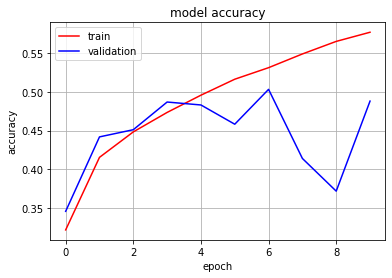

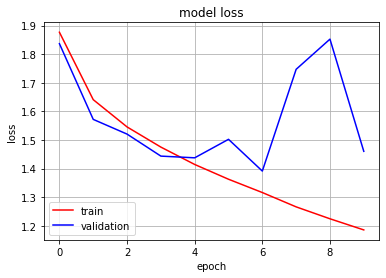

In [22]:
model1 = mlp()
model1.fit(x_train, y_train, x_test, y_test)
model1.report(x_test, y_test)
model1.accuracy_plot()
model1.loss_plot()

This model has these parameters:
- optimizer : SGD(lr=0.005)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

**These parameters are the most efficient one.**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_43 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_44 (Dense)            (None, 600)               615000    
                                                                 
 dense_45 (Dense)            (None, 200)               120200    
                                                                 
 dense_46 (Dense)            (None, 64)                12864     
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 10)               

<Figure size 432x288 with 0 Axes>

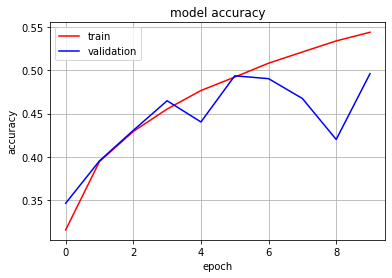

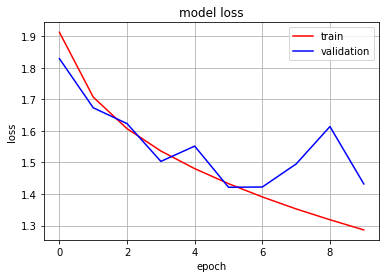

In [23]:
OPTIMIZER = SGD(learning_rate=0.005)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model2 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model2.fit(x_train, y_train, x_test, y_test)
model2.report(x_test, y_test)
model2.accuracy_plot()
model2.loss_plot()

# part 2 : Optimizer

- Momentum is a technique that uses exponentially Weighted Averages to compute Gradient and used this Gradient to update parameter which helps gradient vectors to accelerate in the right directions. It considers a small part of the update vector from last steps and adds that to the current update vector. 

- As the momentum increase, the accuracy and convergence speed increase, but there is benefits and consequences. As the momentum increase, loss of last epochs will have a large effect and change results in a way that accuracy and loss are much lower than their normal values. It means that very large momentum makes the model almost random and the model might just swing back and forward between the local minima. Increasing the momentum can make the model faster but also it can ruin the results

- Adam optimizer uses the squared gradients to scale the learning rate and takes advantage of momentum by using moving average of the gradient instead of gradient itself. Adam computes individual learning rates for different parameters. It uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.

**Based on the results, Adam works faster than SGD and converges in earlier epochs.**

This model has these parameters:
- optimizer : SGD(lr=0.005, momentum=0.5)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_50 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_51 (Dense)            (None, 600)               615000    
                                                                 
 dense_52 (Dense)            (None, 200)               120200    
                                                                 
 dense_53 (Dense)            (None, 64)                12864     
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 10)               

<Figure size 432x288 with 0 Axes>

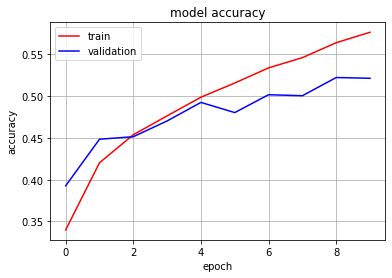

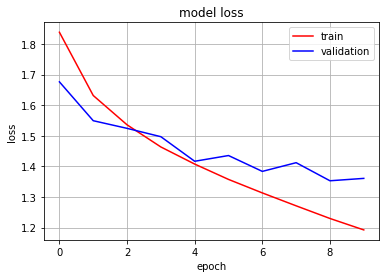

In [24]:
OPTIMIZER = SGD(learning_rate=0.005, momentum=0.5)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model3 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model3.fit(x_train, y_train, x_test, y_test)
model3.report(x_test, y_test)
model3.accuracy_plot()
model3.loss_plot()

This model has these parameters:
- optimizer : SGD(lr=0.005, momentum=0.9)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_57 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_58 (Dense)            (None, 600)               615000    
                                                                 
 dense_59 (Dense)            (None, 200)               120200    
                                                                 
 dense_60 (Dense)            (None, 64)                12864     
                                                                 
 dense_61 (Dense)            (None, 32)                2080      
                                                                 
 dense_62 (Dense)            (None, 10)               

<Figure size 432x288 with 0 Axes>

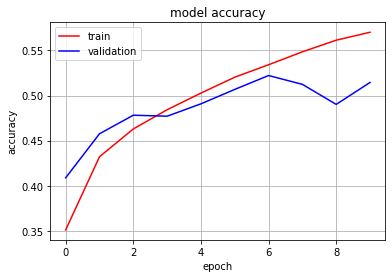

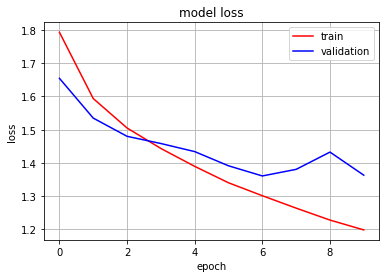

In [25]:
OPTIMIZER = SGD(learning_rate=0.005, momentum=0.9)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model4 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model4.fit(x_train, y_train, x_test, y_test)
model4.report(x_test, y_test)
model4.accuracy_plot()
model4.loss_plot()

This model has these parameters:
- optimizer : SGD(lr=0.005, momentum=0.98)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_64 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_65 (Dense)            (None, 600)               615000    
                                                                 
 dense_66 (Dense)            (None, 200)               120200    
                                                                 
 dense_67 (Dense)            (None, 64)                12864     
                                                                 
 dense_68 (Dense)            (None, 32)                2080      
                                                                 
 dense_69 (Dense)            (None, 10)               

<Figure size 432x288 with 0 Axes>

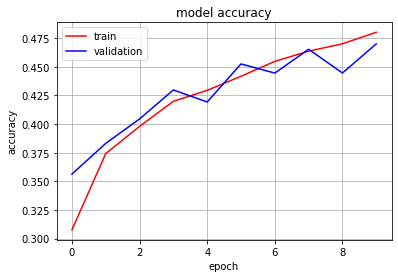

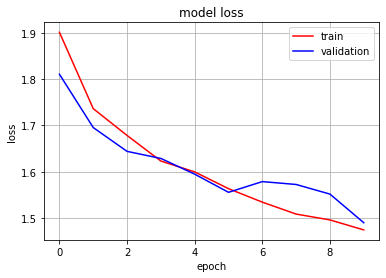

In [26]:
OPTIMIZER = SGD(learning_rate=0.005, momentum=0.98)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model5 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model5.fit(x_train, y_train, x_test, y_test)
model5.report(x_test, y_test)
model5.accuracy_plot()
model5.loss_plot()

This model has these parameters:
- optimizer : Adam(lr=0.0001)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_71 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_72 (Dense)            (None, 600)               615000    
                                                                 
 dense_73 (Dense)            (None, 200)               120200    
                                                                 
 dense_74 (Dense)            (None, 64)                12864     
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 10)              

<Figure size 432x288 with 0 Axes>

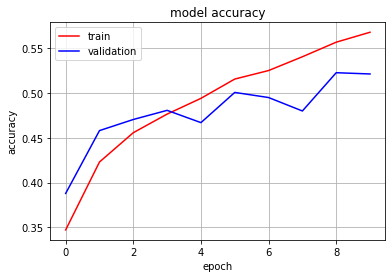

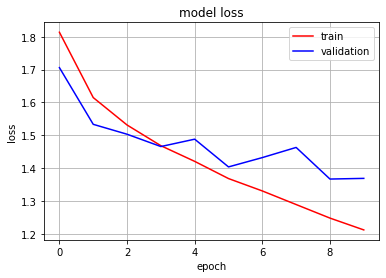

In [27]:
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model6 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model6.fit(x_train, y_train, x_test, y_test)
model6.report(x_test, y_test)
model6.accuracy_plot()
model6.loss_plot()

# part 2 : Epoch

- In normal datasets training for only one epoch results in underfitting because, gradient descent does not reach a global or local minima after one epoch.

- When the number of epochs increases, the model tries to learn details. So if the number of epochs gets too large, the model will learn noise of the train set and it will overfit. In this situation, model loses the generalization and the accuracy of test set drops. 

- There are two usual ways to prevent overfitting:
  - Dropout : In this method, in each epochs a number of layers get disabled. This method prevent from being dependent to just some of the neurons. 
  - Early Stopping : In this method, model stops training when the performance on validation data stops improving.




This model has these parameters:
- optimizer : Adam(lr=0.0001)
- epoch : 100
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_77 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_78 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_79 (Dense)            (None, 600)               615000    
                                                                 
 dense_80 (Dense)            (None, 200)               120200    
                                                                 
 dense_81 (Dense)            (None, 64)                12864     
                                                                 
 dense_82 (Dense)            (None, 32)                2080      
                                                                 
 dense_83 (Dense)            (None, 10)              

<Figure size 432x288 with 0 Axes>

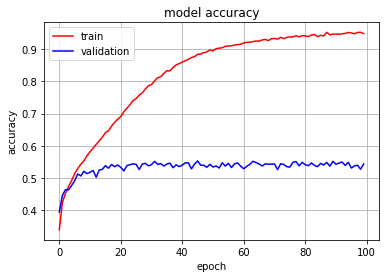

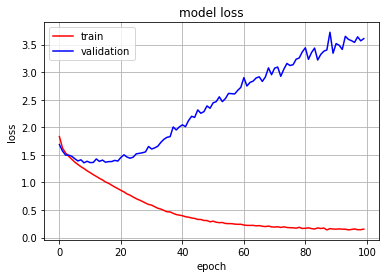

In [28]:
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model7 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model7.fit(x_train, y_train, x_test, y_test, epochs=100)
model7.report(x_test, y_test)
model7.accuracy_plot()
model7.loss_plot()

# part 2 : Loss Function

There are two reasons why Mean Squared Error(MSE) is a bad choice for binary classification problems:

* Using MSE means that we assume that the underlying data has been generated from a normal distribution. In Bayesian terms this means we assume a Gaussian prior.While in reality, a dataset that can be classified into two categories (i.e binary) is not from a normal distribution

* The MSE function is non-convex for binary classification. In simple terms, if a binary classification model is trained with MSE Cost function, it is not guaranteed to minimize the Cost function. This is because MSE function expects real-valued inputs in range(-∞, ∞), while binary classification models output probabilities in range(0,1) through the sigmoid/logistic function.


MSE is a good choice for a Cost function when we are doing Linear Regression.

This model has these parameters:
- optimizer : Adam(lr=0.0001)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_85 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_86 (Dense)            (None, 600)               615000    
                                                                 
 dense_87 (Dense)            (None, 200)               120200    
                                                                 
 dense_88 (Dense)            (None, 64)                12864     
                                                                 
 dense_89 (Dense)            (None, 32)                2080      
                                                                 
 dense_90 (Dense)            (None, 10)              

<Figure size 432x288 with 0 Axes>

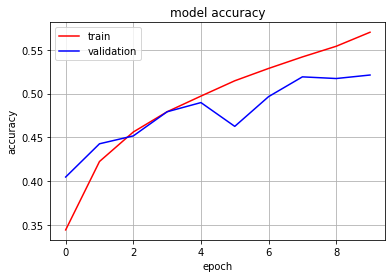

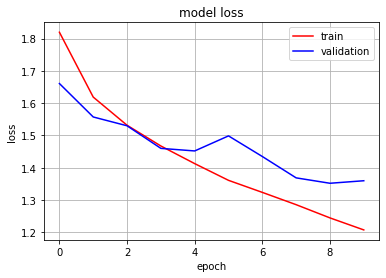

In [29]:
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model8 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model8.fit(x_train, y_train, x_test, y_test)
model8.report(x_test, y_test)
model8.accuracy_plot()
model8.loss_plot()

This model has these parameters:
- optimizer : Adam(lr=0.0001)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : MeanSquaredError

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_91 (Dense)            (None, 3072)              9440256   
                                                                 
 dense_92 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_93 (Dense)            (None, 600)               615000    
                                                                 
 dense_94 (Dense)            (None, 200)               120200    
                                                                 
 dense_95 (Dense)            (None, 64)                12864     
                                                                 
 dense_96 (Dense)            (None, 32)                2080      
                                                                 
 dense_97 (Dense)            (None, 10)              

<Figure size 432x288 with 0 Axes>

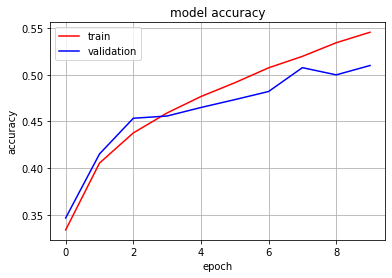

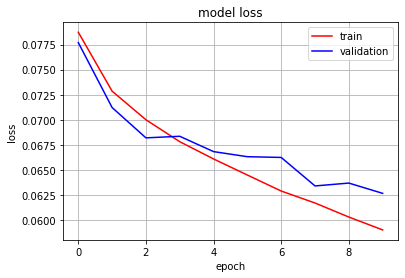

In [30]:
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS = keras.losses.MeanSquaredError()
ACTIVATION = keras.layers.LeakyReLU()
model9 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION)
model9.fit(x_train, y_train, x_test, y_test)
model9.report(x_test, y_test)
model9.accuracy_plot()
model9.loss_plot()

# part 2 : Regulariztion

Regularization is a technique used for tuning the function by adding an additional penalty term in the error function. The additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values.

* L2 regularization : L1 and L2 are the most common types of regularization. These update the general cost function by adding another term known as the regularization term. Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models.

* Dropout: Dropout works by randomly disabling neurons and their corresponding connections. This prevents the network from relying too much on single neurons and forces all neurons to learn to generalize better.


Using regularization, we get smoother curves and overfitting won't happen.
 

This model has these parameters:
- optimizer : Adam(lr=0.0001)
- epoch : 10
- batch_size : 32
- activation function : LeakyRelu()
- loss : categorical_crossentropy
- with dropout

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 3072)              9440256   
                                                                 
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 dense_99 (Dense)            (None, 1024)              3146752   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_100 (Dense)           (None, 600)               615000    
                                                                 
 dropout_2 (Dropout)         (None, 600)               0         
                                                                 
 dense_101 (Dense)           (None, 200)             

<Figure size 432x288 with 0 Axes>

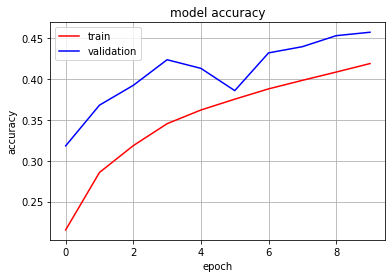

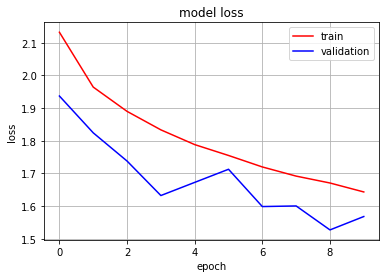

In [31]:
OPTIMIZER = Adam(learning_rate=0.0001)
LOSS = 'categorical_crossentropy'
ACTIVATION = keras.layers.LeakyReLU()
model10 = mlp(OPTIMIZER=OPTIMIZER, LOSS=LOSS, ACTIVATION=ACTIVATION, drop=True)
model10.fit(x_train, y_train, x_test, y_test)
model10.report(x_test, y_test)
model10.accuracy_plot()
model10.loss_plot()